In [3]:
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral, denoise_nl_means,estimate_sigma
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
import matplotlib.pylab as pylab

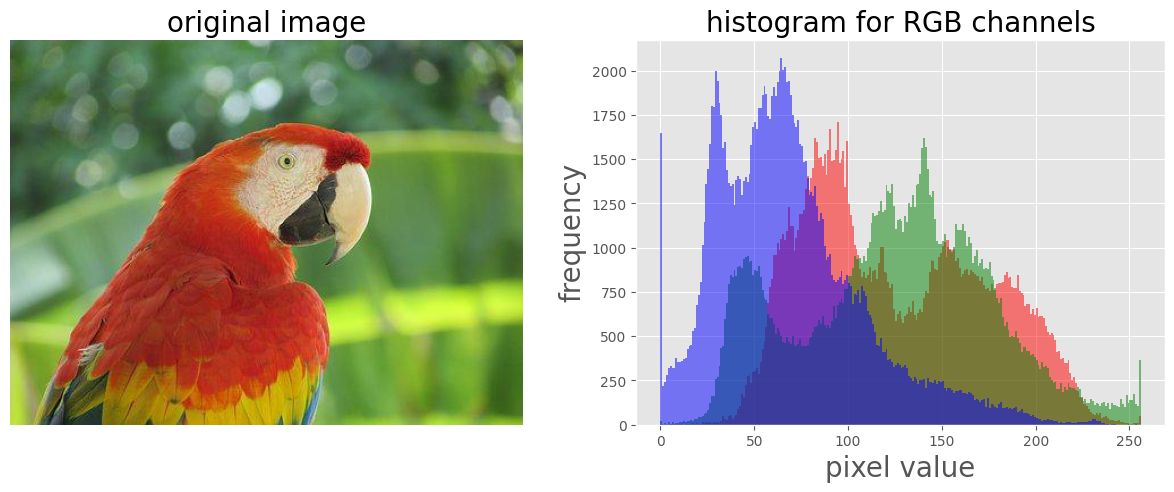

In [ ]:
# Định nghĩa hàm plot_image để hiển thị hình ảnh với tiêu đề
def plot_image(image, title=''):
    pylab.title(title, size=20)  # Đặt tiêu đề cho hình ảnh
    pylab.imshow(image)  # Hiển thị hình ảnh
    pylab.axis('off')  # Tắt hiển thị các trục

# Định nghĩa hàm plot_hist để hiển thị histogram của các kênh màu RGB
def plot_hist(r, g, b, title=''):
    # Chuyển đổi các kênh màu sang kiểu dữ liệu 8-bit unsigned byte
    r, g, b = img_as_ubyte(r), img_as_ubyte(g), img_as_ubyte(b)
    # Hiển thị histogram của kênh màu đỏ
    pylab.hist(np.array(r).ravel(), bins=256, range=(0, 256), color='r', alpha=0.5)
    # Hiển thị histogram của kênh màu xanh lá
    pylab.hist(np.array(g).ravel(), bins=256, range=(0, 256), color='g', alpha=0.5)
    # Hiển thị histogram của kênh màu xanh dương
    pylab.hist(np.array(b).ravel(), bins=256, range=(0, 256), color='b', alpha=0.5)
    pylab.xlabel('pixel value', size=20)  # Đặt nhãn trục x
    pylab.ylabel('frequency', size=20)  # Đặt nhãn trục y
    pylab.title(title, size=20)  # Đặt tiêu đề cho histogram

# Mở hình ảnh từ tệp
im = Image.open("images/parrot.png")

# Tách các kênh màu đỏ, xanh lá và xanh dương của hình ảnh
im_r, im_g, im_b = im.split()

# Sử dụng phong cách ggplot cho các biểu đồ
pylab.style.use('ggplot')

# Tạo một cửa sổ hiển thị với kích thước 15x5 inch
pylab.figure(figsize=(15,5))

# Hiển thị hình ảnh gốc trong subplot đầu tiên
pylab.subplot(121)
plot_image(im, 'original image')

# Hiển thị histogram của các kênh màu RGB trong subplot thứ hai
pylab.subplot(122)
plot_hist(im_r, im_g, im_b, 'histogram for RGB channels')

# Hiển thị toàn bộ hình ảnh với các subplot
pylab.show()

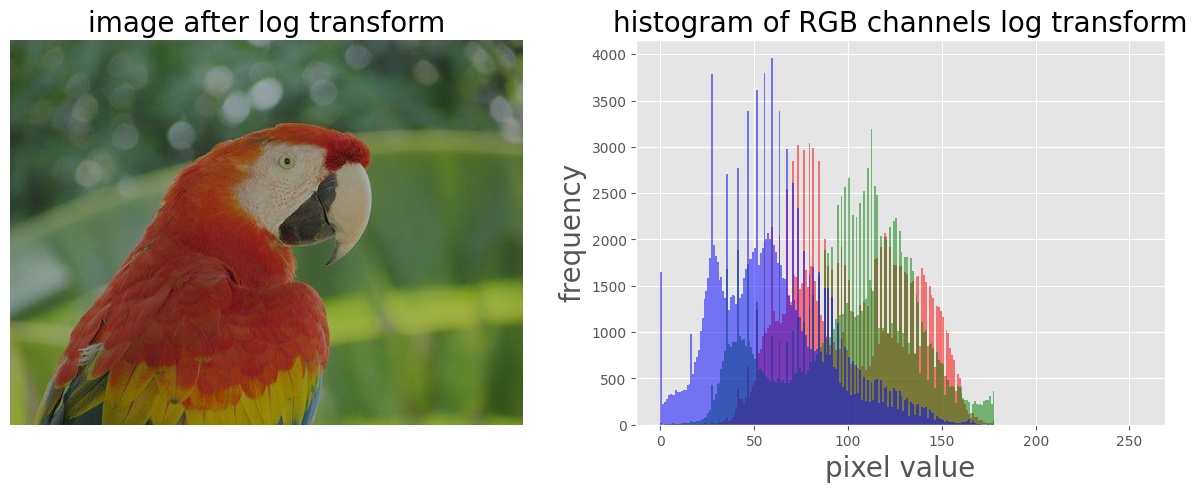

In [ ]:
# Áp dụng biến đổi logarithmic cho ảnh. Điều này giúp làm nổi bật các vùng tối của ảnh bằng cách 
# mở rộng giá trị cường độ pixel.
# np.log(1 + i/255) được áp dụng cho từng pixel, trong đó i là cường độ pixel (0-255).
im = im.point(lambda i: 255 * np.log(1 + i / 255))

# Tách ảnh thành các kênh màu RGB
# im_r, im_g, im_b sẽ chứa các kênh màu đỏ, xanh lá cây và xanh dương của ảnh đã được biến đổi.
im_r, im_g, im_b = im.split()

# Đặt kiểu đồ thị thành 'ggplot' để có giao diện lưới sạch hơn
pylab.style.use('ggplot')

# Tạo một khung hình với kích thước đã xác định
pylab.figure(figsize=(15, 5))

# Hiển thị ảnh đã qua biến đổi logarithmic
# subplot(121) chỉ định rằng ảnh này sẽ ở vị trí đầu tiên trong lưới 1x2 (1 hàng, 2 cột).
pylab.subplot(121)
plot_image(im, 'Ảnh sau biến đổi logarithmic')

# Hiển thị biểu đồ histogram của các kênh RGB
# subplot(122) sẽ đặt biểu đồ này ở vị trí thứ hai trong lưới 1x2.
pylab.subplot(122)
plot_hist(im_r, im_g, im_b, 'Histogram của các kênh RGB sau biến đổi logarithmic')

# Hiển thị toàn bộ đồ thị
pylab.show()

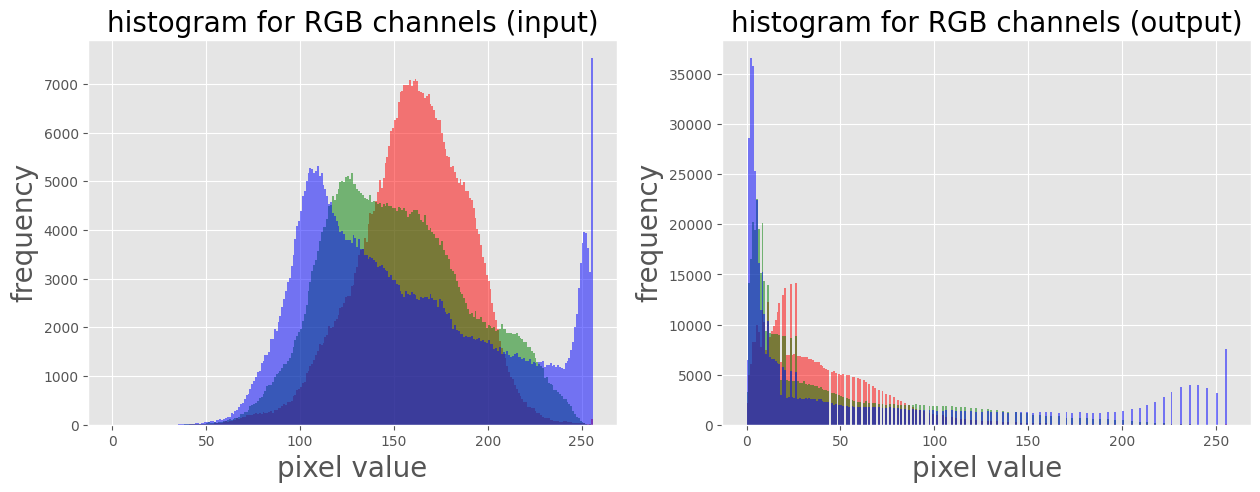

In [ ]:
# Đọc ảnh từ file 'images/earthfromsky.jpg' và chuyển đổi ảnh sang kiểu float 
# (giá trị pixel trong khoảng [0, 1])
im = img_as_float(imread('images/earthfromsky.jpg'))

# Thiết lập giá trị gamma cho phép biến đổi gamma (giá trị càng cao thì càng làm tối ảnh)
gamma = 5

# Áp dụng biến đổi gamma cho ảnh: mỗi pixel được nâng lên lũy thừa gamma
# im1 chứa ảnh đã được biến đổi gamma, giúp tăng độ tương phản ở các vùng tối
im1 = im ** gamma

# Đặt kiểu đồ thị là 'ggplot' để hiển thị đồ thị với phong cách ggplot
pylab.style.use('ggplot')

# Tạo một khung hình với kích thước 15x5 inch
pylab.figure(figsize=(15, 5))

# Hiển thị histogram của các kênh RGB của ảnh gốc (chưa qua biến đổi gamma)
# subplot(121) đặt biểu đồ này ở vị trí đầu tiên trong lưới 1x2 (1 hàng, 2 cột).
pylab.subplot(121)
plot_hist(im[..., 0], im[..., 1], im[..., 2], 'Histogram của các kênh RGB (input)')

# Hiển thị histogram của các kênh RGB của ảnh đã qua biến đổi gamma
# subplot(122) đặt biểu đồ này ở vị trí thứ hai trong lưới 1x2.
pylab.subplot(122)
plot_hist(im1[..., 0], im1[..., 1], im1[..., 2], 'Histogram của các kênh RGB (output)')

# Hiển thị tất cả các biểu đồ và hình ảnh
pylab.show()
